In [1]:
import pydicom as dcm
import os
from tools import *
import json
import matplotlib.pyplot as plt
from anonymization import plot_all_contours

In [2]:
def get_ROI_slice(z_target,z_list):
    
    slice_num = 0
    slice_nums = []
    for z in z_list:
        if z == z_target:
            slice_nums.append(slice_num)
#             return slice_num
        slice_num +=1
    return slice_nums


In [3]:
# def get_CT_RS(CT_path):

In [4]:
# def plot_all(CT_path,slice)

In [5]:
ct_path_new =   '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/973/20230511_CT_04_MAY_2023/'
ct_path_old = '/mnt/iDriveShare/kayla/CBCT_images/kayla_extracted/35/20171220_CT_14_DEC_2017/'
path_new =  '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/limbus_RS/RS.1.2.826.0.1.3680043.8.498.64595475275871969738876242533809592138.dcm'
path_old = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/limbus_RS_OG/RS.1.2.826.0.1.3680043.8.498.65972071637875158961938898909005586459.dcm'

In [6]:
ct_path_new =  '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/833/20190904_CT_27_AUG_2019/'
ct_path_old = '/mnt/iDriveShare/kayla/CBCT_images/kayla_extracted/35/20171220_CT_14_DEC_2017/'
path_new =  '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/limbus_RS/RS.1.2.826.0.1.3680043.8.498.42561134883882627792589335545341939457.dcm'
path_old ='/mnt/iDriveShare/Kayla/CBCT_images/anonymized/limbus_RS_OG/RS.1.2.826.0.1.3680043.8.498.75457766699138089512462606838828966197.dcm'

In [7]:
with open('/data/kayla/deface_file_dict.json',"r") as outfile:
    file_dict = json.load(outfile)

In [8]:
p = '1551'
path_old = file_dict[p]['RS_1']
path_new = file_dict[p]['RS_A']
ct_path_new = os.path.dirname(file_dict[p]['CT'])


KeyError: '1551'

In [34]:
path_new

'/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/1551/20170119_CT_11_JAN_2017/RS.1.2.246.352.221.4782795240278808777.4305137698331010465.dcm'

In [ ]:
# RS_new

In [ ]:
# RS_new.ROIContourSequence[0].ContourSequence[1].ContourData

In [16]:
# ct_path_new = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/1551/20170119_CT_11_JAN_2017/'
# path_new = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/1551/20170119_CT_11_JAN_2017/RS.1.2.246.352.221.4782795240278808777.4305137698331010465.dcm'

In [17]:
RS_new = dcm.read_file(path_new)
RS_old = dcm.read_file(path_old)
# RS_old = dcm.read_file(ct_path_old+'RS.1.2.246.352.221.4891055231146742870.15452388513635501192.dcm')

In [18]:
slices = [dcm.read_file(ct_path_new+'/'+ s) for s in os.listdir(ct_path_new) if 'CT' in s]
# Order slices
slices.sort(key = lambda x: (x.InstanceNumber))
image = get_pixels_hu(slices)
origin = slices[0].ImagePositionPatient
start_z = origin[2]
start_x = origin[0]
start_y = origin[1]
z_spacing = slices[0].SliceThickness 
pixel_spacing = slices[0].PixelSpacing
spacing = [pixel_spacing[0],pixel_spacing[1],z_spacing]


Intersept: -1000
slope: 1


In [19]:
ct_path_new

'/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/1551/20170119_CT_11_JAN_2017/'

In [20]:
z = -444
s = 112


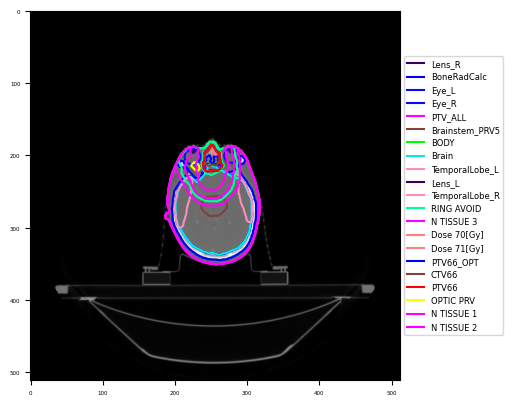

In [21]:
plot_all_contours(RS_new,image,s,origin,spacing,legend=True)

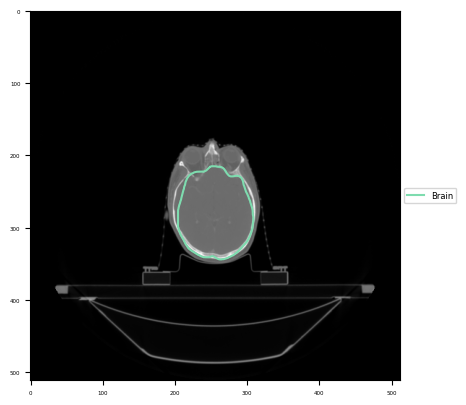

In [22]:
plot_all_contours(RS_old,image,s,origin,spacing,legend=True)

In [23]:
find_ROI_names(RS_new,'eye')

['Eye_L', 'Eye_R']

In [33]:

dict_contours_b, z_lists_b = get_all_ROI_contours(['BODY'], RS_NEW)
print(z_lists_b)
roi_1 = get_ROI_slice(z, z_lists_b[0])[0]
# roi_2 = get_ROI_slice(z, z_lists_b[0])[1]
roi_x_old1, roi_y_old1= get_ROI_pixel_array(dict_contours_b['BODY'][roi_1],start_x,start_y,pixel_spacing)
# roi_x_old2, roi_y_old2= get_ROI_pixel_array(dict_contours_b['BODY'][roi_2],start_x,start_y,pixel_spacing)

dict_contours_b, z_lists_b = get_all_ROI_contours(['PTV_ALL'], RS_new)
roi_1 = get_ROI_slice(z-3*x, z_lists_b[0])[0]
print(z)


roi_x_new1, roi_y_new1= get_ROI_pixel_array(dict_contours_b['PTV_ALL'][roi_1],start_x,start_y,pixel_spacing)

# dict_contours_b

dict_contours_b, z_lists_b = get_all_ROI_contours(['Eye_R'], RS_new)
roi_1 = get_ROI_slice(z-3*x, z_lists_b[0])[0]
# roi_2 = get_ROI_slice(z, z_lists_b[0])[1]
roi_x_new2, roi_y_new2= get_ROI_pixel_array(dict_contours_b['Eye_R'][roi_1],start_x,start_y,pixel_spacing)

dict_contours_b, z_lists_b = get_all_ROI_contours(['Eye_L'], RS_new)
roi_1 = get_ROI_slice(z-3*x, z_lists_b[0])[0]
print(z)


roi_x_new3, roi_y_new3= get_ROI_pixel_array(dict_contours_b['Eye_L'][roi_1],start_x,start_y,pixel_spacing)

NameError: name 'RS_NEW' is not defined

In [32]:
find_ROI_names(RS_new)

['BoneSeg',
 'Lens_R',
 'BrachialPlexus_R',
 'SpinalCord',
 'PharCon_Mid',
 'Pituitary',
 'BoneRadCalc',
 'BrachialPlexus_L',
 'Cochlea_R',
 'Eye_L',
 'Eye_R',
 'Lips',
 'PharCon_Sup',
 'OralCavity',
 'SubmndSalv_L',
 'PharCon_Inf',
 'PTV_ALL',
 'OpticNerve_R',
 'Larynx',
 'Thyroid',
 'Mandible',
 'Cochlea_L',
 'Esophagus_Upper',
 'Chiasm',
 'OpticNerve_L',
 'Brainstem_PRV5',
 'Brainstem',
 'MIDDLE AVOID',
 'POST AVOID',
 'BODY',
 'SubmndSalv_R',
 'Brain',
 'TemporalLobe_L',
 'Parotid_L',
 'Lens_L',
 'TemporalLobe_R',
 'SpinalCord_PRV5',
 'Parotid_R',
 'RING AVOID',
 'AVOID 53.2',
 'N TISSUE 3',
 'Dose 70[Gy]',
 'Dose 71[Gy]',
 'PTV66_OPT',
 'LUNG_L',
 'LUNG_R',
 'ESOPHAGUS_2CM',
 'CTV66',
 'CTV56',
 'PTV66',
 'OPTIC APPAR',
 'OPTIC PRV',
 'PTV56',
 'optic prv&PTV',
 'N TISSUE 1',
 'N TISSUE 2',
 'DENSITY OVERRIDE']

In [27]:
dict_contours_b

{'Eye_L': [[24.62, 10.31, -462, 27.03, 9.76, -462, 29.43, 10.66, -462, 30.7, 11.93, -462, 31.31, 14.33, -462, 30.7, 16.74, -462, 29.43, 18.01, -462, 27.03, 18.91, -462, 24.62, 18.36, -462, 22.9, 16.74, -462, 22.29, 14.33, -462, 22.9, 11.93, -462],
  [22.22, 7.05, -459, 24.62, 5.93, -459, 27.03, 6, -459, 29.43, 6.35, -459, 30.53, 7.13, -459, 31.83, 8.05, -459, 33.23, 9.53, -459, 34.23, 11.17, -459, 34.73, 11.93, -459, 35.06, 14.33, -459, 34.87, 16.74, -459, 34.23, 17.82, -459, 33.5, 19.14, -459, 31.83, 21.02, -459, 31.13, 21.54, -459, 29.43, 22.68, -459, 27.03, 23.12, -459, 24.62, 22.9, -459, 22.22, 22.07, -459, 21.66, 21.54, -459, 19.82, 19.82, -459, 19.18, 19.14, -459, 18.19, 16.74, -459, 17.91, 14.33, -459, 18.24, 11.93, -459, 19.44, 9.53, -459, 19.82, 9.15, -459, 22.14, 7.13, -459],
  [22.22, 3.59, -456, 24.62, 3.1, -456, 27.03, 2.85, -456, 29.43, 3.24, -456, 31.83, 4.09, -456, 32.66, 4.73, -456, 34.23, 5.93, -456, 35.31, 7.13, -456, 36.64, 9.07, -456, 36.99, 9.53, -456, 37.61, 11.9

In [28]:
z_spacing
x=2

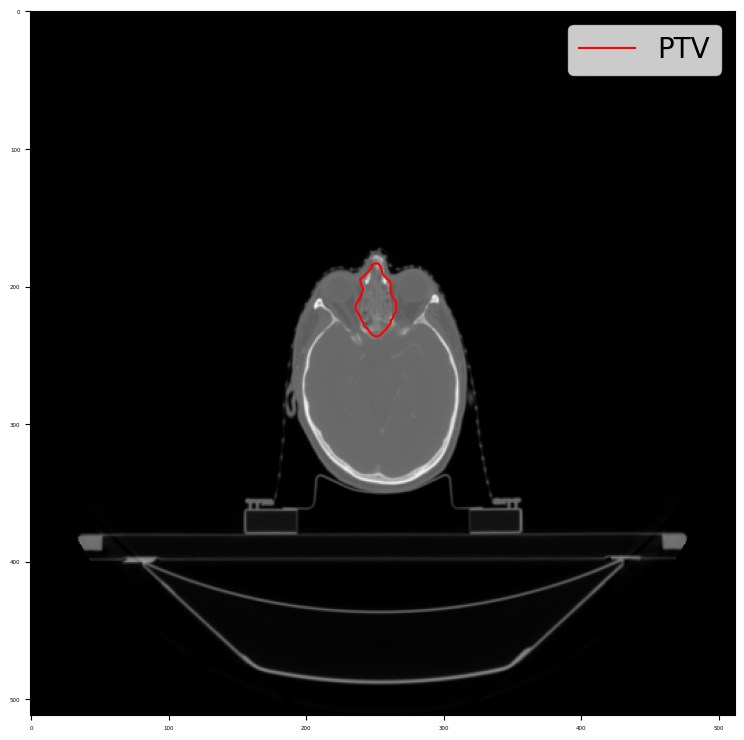

In [29]:

fig = plt.figure(figsize=(20, 10))
# plt.rcParams.update({'font.size': 50})
fig.add_subplot(1,2,1)
plt.imshow(image[s-x],cmap='gray')

plt.plot(roi_x_new1,roi_y_new1,'-',color='red',label='PTV')

# plt.plot(roi_x_new2,roi_y_new2,'-',color='blue',label='Eyes')

# plt.plot(roi_x_new3,roi_y_new3,'-',color='blue')
plt.legend(fontsize=20)

In [135]:
# find_ROI_names(RS_old)

In [14]:
slices2 = [dcm.read_file(ct_path_old+ s) for s in os.listdir(ct_path_old) if 'CT' in s]
# Order slices
slices2.sort(key = lambda x: (x.InstanceNumber))

origin2 = slices2[0].ImagePositionPatient
start_z2 = origin2[2]
start_x2 = origin2[0]
start_y2 = origin2[1]
z_spacing2 = slices2[0].SliceThickness 
pixel_spacing2 = slices2[0].PixelSpacing
spacing2 = [pixel_spacing2[0],pixel_spacing2[1],z_spacing2]

image2 = get_pixels_hu(slices2)

Intersept: -1000
slope: 1


In [38]:
z=-444

In [39]:
slice_num = int((z-start_z)/z_spacing)
print(slice_num)
# slice_num=100
# z = slice_num*z_spacing+start_z
# print(z)

112


In [18]:
# get_all_ROI_contours(['BODY'], RS_old)

BODY BODY


({'BODY': [[80.29, -14.47, -645, 82.5, -14.86, -645, 84.72, -15.2, -645, 86.93, -15.51, -645, 89.15, -15.77, -645, 91.36, -15.94, -645, 93.58, -16.03, -645, 95.79, -16.06, -645, 98.01, -16.03, -645, 100.22, -15.94, -645, 102.44, -15.77, -645, 104.65, -15.51, -645, 106.87, -15.25, -645, 109.08, -14.96, -645, 111.3, -14.59, -645, 111.85, -14.4, -645, 113.51, -13.88, -645, 115.73, -13.56, -645, 117.94, -12.91, -645, 120.16, -12.26, -645, 120.28, -12.19, -645, 122.37, -11.25, -645, 124.58, -10.77, -645, 126.38, -9.97, -645, 126.8, -9.78, -645, 129.01, -8.87, -645, 131.23, -7.97, -645, 131.53, -7.76, -645, 133.44, -6.65, -645, 135.66, -5.87, -645, 136.12, -5.54, -645, 137.87, -4.54, -645, 139.83, -3.33, -645, 140.09, -3.14, -645, 142.3, -1.91, -645, 143.41, -1.11, -645, 144.52, -0.36, -645, 146.5, 1.1, -645, 146.73, 1.3, -645, 148.95, 2.97, -645, 149.34, 3.32, -645, 151.16, 4.81, -645, 151.98, 5.53, -645, 153.38, 6.77, -645, 154.36, 7.75, -645, 155.59, 8.98, -645, 156.63, 9.96, -645, 157.81

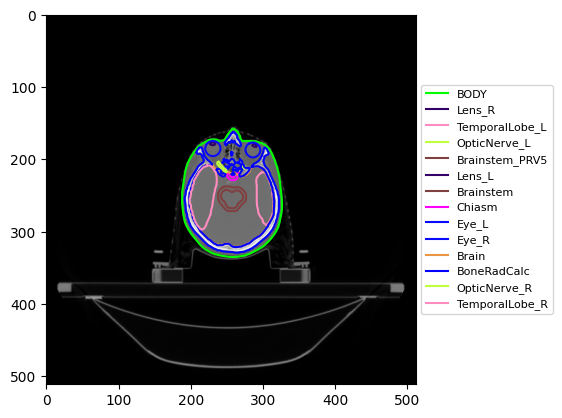

In [16]:
plot_all_contours(RS_old,image2,90,origin2,spacing2,legend=True)


NameError: name 'slice_num' is not defined

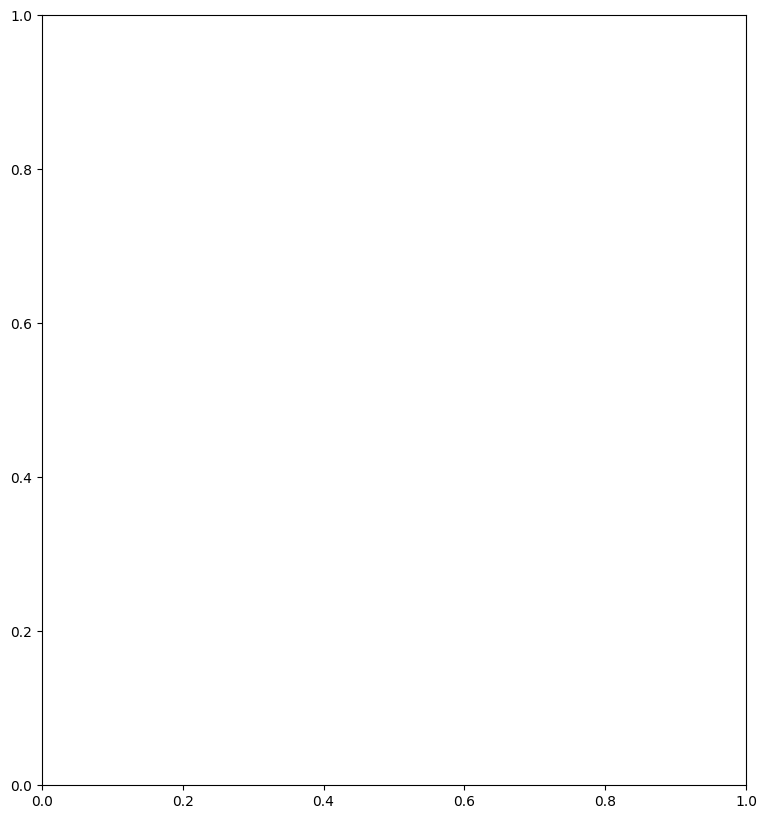

In [13]:

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1,2,1)
plt.imshow(image[slice_num],cmap='gray')

plt.plot(roi_x_old1,roi_y_old1,'-',color='magenta')
# plt.plot(roi_x_old2,roi_y_old2,'-',color='yellow')

fig.add_subplot(1,2,2)
plt.imshow(image[slice_num],cmap='gray')
plt.plot(roi_x_new1,roi_y_new1,'-',color='blue')
# plt.plot(roi_x_new2,roi_y_new2,'-',color='orange')

In [124]:
cnt = ['-6.76', 8.889999999999999, '-497.0', '-5.91', 8.889999999999999, '-497.0', '-4.3', 8.889999999999999, '-497.0', '-2.93', 8.889999999999999, '-497.0', '-1.84', 8.889999999999999, '-497.0', '-0.61', 8.889999999999999, '-497.0', '-0.27', 8.889999999999999, '-497.0', '0.61', 8.889999999999999, '-497.0', '1.12', 8.889999999999999, '-497.0', '1.92', 8.889999999999999, '-497.0', '2.32', 8.889999999999999, '-497.0', '3.07', 8.889999999999999, '-497.0', '3.43', 8.889999999999999, '-497.0', '4.01', 8.889999999999999, '-497.0', '5.14', 8.889999999999999, '-497.0', '5.53', 8.889999999999999, '-497.0', '7.33', 8.889999999999999, '-497.0', '7.99', 8.889999999999999, '-497.0', '10.2', 8.889999999999999, '-497.0', '10.44', 8.889999999999999, '-497.0', '12.9', 8.889999999999999, '-497.0', '15.36', 8.889999999999999, '-497.0', '16.43', 8.889999999999999, '-497.0', '17.81', 8.889999999999999, '-497.0', '20.27', 8.889999999999999, '-497.0', '22.73', 8.889999999999999, '-497.0', '25.18', 8.889999999999999, '-497.0', '27.64', 8.889999999999999, '-497.0', '30.1', 8.889999999999999, '-497.0', '32.56', 8.889999999999999, '-497.0', '34.4', 8.889999999999999, '-497.0', '35.01', 8.889999999999999, '-497.0', '37.47', 8.889999999999999, '-497.0', '38.78', 8.889999999999999, '-497.0', '39.93', 8.889999999999999, '-497.0', '41.3', 8.889999999999999, '-497.0', '42.38', 8.889999999999999, '-497.0', '43.35', 8.889999999999999, '-497.0', '44.84', 8.889999999999999, '-497.0', '45.22', 8.889999999999999, '-497.0', '46.91', 8.889999999999999, '-497.0', '47.3', '8.97', '-497.0', '48.87', '10.99', '-497.0', '49.75', '12.05', '-497.0', '51.06', '13.45', '-497.0', '52.21', '14.53', '-497.0', '53.77', '15.9', '-497.0', '54.67', '16.7', '-497.0', '57.13', '18.0', '-497.0', '57.56', '18.36', '-497.0', '59.58', '20.02', '-497.0', '60.38', '20.82', '-497.0', '61.66', '23.27', '-497.0', '62.04', '23.71', '-497.0', '63.61', '25.73', '-497.0', '64.5', '26.96', '-497.0', '65.44', '28.19', '-497.0', '66.16', '30.65', '-497.0', '66.95', '31.69', '-497.0', '67.92', '33.1', '-497.0', '69.41', '35.46', '-497.0', '69.49', '35.56', '-497.0', '70.06', '38.02', '-497.0', '70.41', '40.47', '-497.0', '70.87', '42.93', '-497.0', '71.39', '45.39', '-497.0', '71.87', '46.34', '-497.0', '72.62', '47.84', '-497.0', '72.71', '50.3', '-497.0', '72.81', '52.76', '-497.0', '72.95', '55.22', '-497.0', '73.33', '57.67', '-497.0', '73.48', '60.13', '-497.0', '74.33', '61.73', '-497.0', '74.83', '62.59', '-497.0', '75.48', '65.04', '-497.0', '75.94', '67.5', '-497.0', '76.78', '68.95', '-497.0', '77.43', '69.96', '-497.0', '77.87', '72.42', '-497.0', '77.87', '74.87', '-497.0', '78.01', '77.33', '-497.0', '78.24', '79.79', '-497.0', '78.44', '82.24', '-497.0', '78.73', '84.7', '-497.0', '79.24', '85.93', '-497.0', '79.75', '87.16', '-497.0', '80.03', '89.61', '-497.0', '80.32', '92.07', '-497.0', '80.47', '94.53', '-497.0', '80.54', '96.99', '-497.0', '80.47', '99.44', '-497.0', '80.39', '101.9', '-497.0', '80.32', '104.36', '-497.0', '80.03', '106.81', '-497.0', '79.6', '109.27', '-497.0', '79.24', '109.88', '-497.0', '78.27', '111.73', '-497.0', '77.93', '114.18', '-497.0', '77.53', '116.64', '-497.0', '76.78', '117.99', '-497.0', '76.13', '119.1', '-497.0', '75.55', '121.56', '-497.0', '75.17', '124.01', '-497.0', '74.33', '125.61', '-497.0', '73.85', '126.47', '-497.0', '73.33', '128.93', '-497.0', '73.02', '131.38', '-497.0', '72.62', '133.84', '-497.0', '71.87', '135.34', '-497.0', '71.39', '136.3', '-497.0', '70.87', '138.75', '-497.0', '70.41', '141.21', '-497.0', '70.16', '143.67', '-497.0', '69.41', '145.02', '-497.0', '68.8', '146.13', '-497.0', '68.26', '148.58', '-497.0', '67.46', '151.04', '-497.0', '66.95', '151.82', '-497.0', '65.93', '153.5', '-497.0', '65.15', '155.95', '-497.0', '64.5', '156.96', '-497.0', '63.61', '158.41', '-497.0', '62.69', '160.87', '-497.0', '62.04', '161.87', '-497.0', '61.15', '163.33', '-497.0', '60.23', '165.78', '-497.0', '59.58', '166.63', '-497.0', '58.42', '168.24', '-497.0', '57.13', '169.7', '-497.0', '56.13', '170.7', '-497.0', '54.67', '172.07', '-497.0', '53.58', '173.15', '-497.0', '52.21', '174.61', '-497.0', '51.27', '175.61', '-497.0', '49.75', '177.59', '-497.0', '49.32', '178.07', '-497.0', '47.3', '179.64', '-497.0', '46.07', '180.52', '-497.0', '44.84', '181.41', '-497.0', '42.38', '182.19', '-497.0', '41.26', '182.98', '-497.0', '39.93', '183.87', '-497.0', '37.47', '184.55', '-497.0', '36.14', '185.44', '-497.0', '35.01', '186.23', '-497.0', '32.56', '186.87', '-497.0', '30.88', '187.9', '-497.0', '30.1', '188.4', '-497.0', '27.64', '189.05', '-497.0', '25.18', '189.51', '-497.0', '23.59', '190.35', '-497.0', '22.73', '190.83', '-497.0', '20.27', '191.25', '-497.0', '17.81', '191.5', '-497.0', '15.36', '191.66', '-497.0', '12.9', '191.96', '-497.0', '10.44', '192.2', '-497.0', '8.86', '192.81', '-497.0', '7.99', '193.17', '-497.0', '5.53', '193.35', '-497.0', '3.07', '193.46', '-497.0', '0.61', '193.6', '-497.0', '-1.84', '193.5', '-497.0', '-4.3', '193.46', '-497.0', '-6.76', '193.17', '-497.0', '-7.99', '192.81', '-497.0', '-9.21', '192.45', '-497.0', '-11.67', '192.12', '-497.0', '-14.13', '191.87', '-497.0', '-16.58', '191.66', '-497.0', '-19.04', '191.5', '-497.0', '-21.5', '191.2', '-497.0', '-23.96', '190.86', '-497.0', '-24.82', '190.35', '-497.0', '-26.41', '189.51', '-497.0', '-28.87', '189.05', '-497.0', '-31.33', '188.4', '-497.0', '-32.11', '187.9', '-497.0', '-33.78', '186.87', '-497.0', '-36.24', '186.19', '-497.0', '-37.47', '185.44', '-497.0', '-38.7', '184.64', '-497.0', '-41.16', '183.87', '-497.0', '-42.49', '182.98', '-497.0', '-43.61', '182.19', '-497.0', '-46.07', '181.17', '-497.0', '-46.86', '180.52', '-497.0', '-48.53', '179.23', '-497.0', '-50.02', '178.07', '-497.0', '-50.98', '177.27', '-497.0', '-52.75', '175.61', '-497.0', '-53.44', '174.96', '-497.0', '-55.9', '173.54', '-497.0', '-56.28', '173.15', '-497.0', '-58.35', '171.2', '-497.0', '-58.86', '170.7', '-497.0', '-60.43', '168.24', '-497.0', '-60.81', '167.77', '-497.0', '-62.1', '165.78', '-497.0', '-63.27', '163.99', '-497.0', '-63.77', '163.33', '-497.0', '-65.08', '160.87', '-497.0', '-65.73', '160.08', '-497.0', '-67.1', '158.41', '-497.0', '-68.18', '157.18', '-497.0', '-69.21', '155.95', '-497.0', '-70.64', '154.11', '-497.0', '-71.15', '153.5', '-497.0', '-72.07', '151.04', '-497.0', '-73.1', '149.5', '-497.0', '-73.71', '148.58', '-497.0', '-74.39', '146.13', '-497.0', '-75.55', '144.23', '-497.0', '-75.94', '143.67', '-497.0', '-76.64', '141.21', '-497.0', '-77.26', '138.75', '-497.0', '-78.01', '137.53', '-497.0', '-78.76', '136.3', '-497.0', '-79.32', '133.84', '-497.0', '-80.11', '131.38', '-497.0', '-80.47', '130.77', '-497.0', '-81.49', '128.93', '-497.0', '-82.17', '126.47', '-497.0', '-82.92', '125.34', '-497.0', '-83.81', '124.01', '-497.0', '-84.36', '121.56', '-497.0', '-85.38', '119.71', '-497.0', '-85.74', '119.1', '-497.0', '-86.23', '116.64', '-497.0', '-86.53', '114.18', '-497.0', '-87.15', '111.73', '-497.0', '-87.62', '109.27', '-497.0', '-87.84', '109.04', '-497.0', '-88.1', '109.27', '-497.0', '-90.3', '111.08', '-497.0', '-91.15', '111.73', '-497.0', '-92.75', '112.89', '-497.0', '-93.91', '111.73', '-497.0', '-95.21', '109.78', '-497.0', '-95.59', '109.27', '-497.0', '-96.0', '106.81', '-497.0', '-96.05', '104.36', '-497.0', '-95.72', '101.9', '-497.0', '-95.21', '101.12', '-497.0', '-94.29', '99.44', '-497.0', '-92.75', '97.39', '-497.0', '-92.37', '96.99', '-497.0', '-90.95', '94.53', '-497.0', '-90.66', '92.07', '-497.0', '-90.3', '90.54', '-497.0', '-90.08', '89.61', '-497.0', '-89.91', '87.16', '-497.0', '-89.6', '84.7', '-497.0', '-89.3', '82.24', '-497.0', '-89.14', '79.79', '-497.0', '-89.07', '77.33', '-497.0', '-89.07', '74.87', '-497.0', '-89.07', '72.42', '-497.0', '-88.99', '69.96', '-497.0', '-88.92', '67.5', '-497.0', '-88.78', '65.04', '-497.0', '-88.53', '62.59', '-497.0', '-88.34', '60.13', '-497.0', '-87.84', '58.7', '-497.0', '-87.48', '57.67', '-497.0', '-87.19', '55.22', '-497.0', '-87.04', '52.76', '-497.0', '-87.04', '50.3', '-497.0', '-87.19', '47.84', '-497.0', '-87.15', '45.39', '-497.0', '-86.75', '42.93', '-497.0', '-86.38', '40.47', '-497.0', '-85.89', '38.02', '-497.0', '-85.38', '37.06', '-497.0', '-84.63', '35.56', '-497.0', '-84.23', '33.1', '-497.0', '-83.46', '30.65', '-497.0', '-82.92', '30.03', '-497.0', '-81.57', '28.19', '-497.0', '-80.47', '26.7', '-497.0', '-79.67', '25.73', '-497.0', '-78.66', '23.27', '-497.0', '-78.01', '22.54', '-497.0', '-76.49', '20.82', '-497.0', '-75.55', '19.82', '-497.0', '-74.26', '18.36', '-497.0', '-73.1', '16.87', '-497.0', '-72.3', '15.9', '-497.0', '-71.43', '13.45', '-497.0', '-70.64', '12.6', '-497.0', '-69.21', '10.99', '-497.0', '-68.18', '9.67', '-497.0', '-67.34', 8.889999999999999, '-497.0', '-65.73', 8.889999999999999, '-497.0', '-65.48', 8.889999999999999, '-497.0', '-63.27', 8.889999999999999, '-497.0', '-62.58', 8.889999999999999, '-497.0', '-60.81', 8.889999999999999, '-497.0', '-60.27', 8.889999999999999, '-497.0', '-58.57', 8.889999999999999, '-497.0', '-58.35', 8.889999999999999, '-497.0', '-55.9', 8.889999999999999, '-497.0', '-53.44', 8.889999999999999, '-497.0', '-52.83', 8.889999999999999, '-497.0', '-50.98', 8.889999999999999, '-497.0', '-48.53', 8.889999999999999, '-497.0', '-46.07', 8.889999999999999, '-497.0', '-43.61', 8.889999999999999, '-497.0', '-41.16', 8.889999999999999, '-497.0', '-38.7', 8.889999999999999, '-497.0', '-36.24', 8.889999999999999, '-497.0', '-33.78', 8.889999999999999, '-497.0', '-31.33', 8.889999999999999, '-497.0', '-28.87', 8.889999999999999, '-497.0', '-26.41', 8.889999999999999, '-497.0', '-26.3', 8.889999999999999, '-497.0', '-23.96', 8.889999999999999, '-497.0', '-22.46', 8.889999999999999, '-497.0', '-21.5', 8.889999999999999, '-497.0', '-20.07', 8.889999999999999, '-497.0', '-19.04', 8.889999999999999, '-497.0', '-18.43', 8.889999999999999, '-497.0', '-17.74', 8.889999999999999, '-497.0', '-17.09', 8.889999999999999, '-497.0', '-16.58', 8.889999999999999, '-497.0', '-15.83', 8.889999999999999, '-497.0', '-15.07', 8.889999999999999, '-497.0', '-14.13', 8.889999999999999, '-497.0', '-13.33', 8.889999999999999, '-497.0', '-12.32', 8.889999999999999, '-497.0', '-11.67', 8.889999999999999, '-497.0', '-9.21', 8.889999999999999, '-497.0', '-8.14', 8.889999999999999, '-497.0']
cnt_clean = []
for c in cnt:
    cnt_clean.append(float(c))
roi_x_new1, roi_y_new1= get_ROI_pixel_array(cnt_clean,start_x,start_y,pixel_spacing)

In [99]:
row = ['-6.76', 8.889999999999999, '-497.0', '-5.91', 8.889999999999999, '-497.0', '-4.3', 8.889999999999999, '-497.0', '-2.93', 8.889999999999999, '-497.0', '-1.84', 8.889999999999999, '-497.0', '-0.61', 8.889999999999999, '-497.0', '-0.27', 8.889999999999999, '-497.0', '0.61', 8.889999999999999, '-497.0', '1.12', 8.889999999999999, '-497.0', '1.92', 8.889999999999999, '-497.0', '2.32', 8.889999999999999, '-497.0', '3.07', 8.889999999999999, '-497.0', '3.43', 8.889999999999999, '-497.0', '4.01', 8.889999999999999, '-497.0', '5.14', 8.889999999999999, '-497.0', '5.53', 8.889999999999999, '-497.0', '7.33', 8.889999999999999, '-497.0', '7.99', 8.889999999999999, '-497.0', '10.2', 8.889999999999999, '-497.0', '10.44', 8.889999999999999, '-497.0', '12.9', 8.889999999999999, '-497.0', '15.36', 8.889999999999999, '-497.0', '16.43', 8.889999999999999, '-497.0', '17.81', 8.889999999999999, '-497.0', '20.27', 8.889999999999999, '-497.0', '22.73', 8.889999999999999, '-497.0', '25.18', 8.889999999999999, '-497.0', '27.64', 8.889999999999999, '-497.0', '30.1', 8.889999999999999, '-497.0', '32.56', 8.889999999999999, '-497.0', '34.4', 8.889999999999999, '-497.0', '35.01', 8.889999999999999, '-497.0', '37.47', 8.889999999999999, '-497.0', '38.78', 8.889999999999999, '-497.0', '39.93', 8.889999999999999, '-497.0', '41.3', 8.889999999999999, '-497.0', '42.38', 8.889999999999999, '-497.0', '43.35', 8.889999999999999, '-497.0', '44.84', 8.889999999999999, '-497.0', '45.22', 8.889999999999999, '-497.0', '46.91', 8.889999999999999, '-497.0', '47.3', '8.97', '-497.0', '48.87', '10.99', '-497.0', '49.75', '12.05', '-497.0', '51.06', '13.45', '-497.0', '52.21', '14.53', '-497.0', '53.77', '15.9', '-497.0', '54.67', '16.7', '-497.0', '57.13', '18.0', '-497.0', '57.56', '18.36', '-497.0', '59.58', '20.02', '-497.0', '60.38', '20.82', '-497.0', '61.66', '23.27', '-497.0', '62.04', '23.71', '-497.0', '63.61', '25.73', '-497.0', '64.5', '26.96', '-497.0', '65.44', '28.19', '-497.0', '66.16', '30.65', '-497.0', '66.95', '31.69', '-497.0', '67.92', '33.1', '-497.0', '69.41', '35.46', '-497.0', '69.49', '35.56', '-497.0', '70.06', '38.02', '-497.0', '70.41', '40.47', '-497.0', '70.87', '42.93', '-497.0', '71.39', '45.39', '-497.0', '71.87', '46.34', '-497.0', '72.62', '47.84', '-497.0', '72.71', '50.3', '-497.0', '72.81', '52.76', '-497.0', '72.95', '55.22', '-497.0', '73.33', '57.67', '-497.0', '73.48', '60.13', '-497.0', '74.33', '61.73', '-497.0', '74.83', '62.59', '-497.0', '75.48', '65.04', '-497.0', '75.94', '67.5', '-497.0', '76.78', '68.95', '-497.0', '77.43', '69.96', '-497.0', '77.87', '72.42', '-497.0', '77.87', '74.87', '-497.0', '78.01', '77.33', '-497.0', '78.24', '79.79', '-497.0', '78.44', '82.24', '-497.0', '78.73', '84.7', '-497.0', '79.24', '85.93', '-497.0', '79.75', '87.16', '-497.0', '80.03', '89.61', '-497.0', '80.32', '92.07', '-497.0', '80.47', '94.53', '-497.0', '80.54', '96.99', '-497.0', '80.47', '99.44', '-497.0', '80.39', '101.9', '-497.0', '80.32', '104.36', '-497.0', '80.03', '106.81', '-497.0', '79.6', '109.27', '-497.0', '79.24', '109.88', '-497.0', '78.27', '111.73', '-497.0', '77.93', '114.18', '-497.0', '77.53', '116.64', '-497.0', '76.78', '117.99', '-497.0', '76.13', '119.1', '-497.0', '75.55', '121.56', '-497.0', '75.17', '124.01', '-497.0', '74.33', '125.61', '-497.0', '73.85', '126.47', '-497.0', '73.33', '128.93', '-497.0', '73.02', '131.38', '-497.0', '72.62', '133.84', '-497.0', '71.87', '135.34', '-497.0', '71.39', '136.3', '-497.0', '70.87', '138.75', '-497.0', '70.41', '141.21', '-497.0', '70.16', '143.67', '-497.0', '69.41', '145.02', '-497.0', '68.8', '146.13', '-497.0', '68.26', '148.58', '-497.0', '67.46', '151.04', '-497.0', '66.95', '151.82', '-497.0', '65.93', '153.5', '-497.0', '65.15', '155.95', '-497.0', '64.5', '156.96', '-497.0', '63.61', '158.41', '-497.0', '62.69', '160.87', '-497.0', '62.04', '161.87', '-497.0', '61.15', '163.33', '-497.0', '60.23', '165.78', '-497.0', '59.58', '166.63', '-497.0', '58.42', '168.24', '-497.0', '57.13', '169.7', '-497.0', '56.13', '170.7', '-497.0', '54.67', '172.07', '-497.0', '53.58', '173.15', '-497.0', '52.21', '174.61', '-497.0', '51.27', '175.61', '-497.0', '49.75', '177.59', '-497.0', '49.32', '178.07', '-497.0', '47.3', '179.64', '-497.0', '46.07', '180.52', '-497.0', '44.84', '181.41', '-497.0', '42.38', '182.19', '-497.0', '41.26', '182.98', '-497.0', '39.93', '183.87', '-497.0', '37.47', '184.55', '-497.0', '36.14', '185.44', '-497.0', '35.01', '186.23', '-497.0', '32.56', '186.87', '-497.0', '30.88', '187.9', '-497.0', '30.1', '188.4', '-497.0', '27.64', '189.05', '-497.0', '25.18', '189.51', '-497.0', '23.59', '190.35', '-497.0', '22.73', '190.83', '-497.0', '20.27', '191.25', '-497.0', '17.81', '191.5', '-497.0', '15.36', '191.66', '-497.0', '12.9', '191.96', '-497.0', '10.44', '192.2', '-497.0', '8.86', '192.81', '-497.0', '7.99', '193.17', '-497.0', '5.53', '193.35', '-497.0', '3.07', '193.46', '-497.0', '0.61', '193.6', '-497.0', '-1.84', '193.5', '-497.0', '-4.3', '193.46', '-497.0', '-6.76', '193.17', '-497.0', '-7.99', '192.81', '-497.0', '-9.21', '192.45', '-497.0', '-11.67', '192.12', '-497.0', '-14.13', '191.87', '-497.0', '-16.58', '191.66', '-497.0', '-19.04', '191.5', '-497.0', '-21.5', '191.2', '-497.0', '-23.96', '190.86', '-497.0', '-24.82', '190.35', '-497.0', '-26.41', '189.51', '-497.0', '-28.87', '189.05', '-497.0', '-31.33', '188.4', '-497.0', '-32.11', '187.9', '-497.0', '-33.78', '186.87', '-497.0', '-36.24', '186.19', '-497.0', '-37.47', '185.44', '-497.0', '-38.7', '184.64', '-497.0', '-41.16', '183.87', '-497.0', '-42.49', '182.98', '-497.0', '-43.61', '182.19', '-497.0', '-46.07', '181.17', '-497.0', '-46.86', '180.52', '-497.0', '-48.53', '179.23', '-497.0', '-50.02', '178.07', '-497.0', '-50.98', '177.27', '-497.0', '-52.75', '175.61', '-497.0', '-53.44', '174.96', '-497.0', '-55.9', '173.54', '-497.0', '-56.28', '173.15', '-497.0', '-58.35', '171.2', '-497.0', '-58.86', '170.7', '-497.0', '-60.43', '168.24', '-497.0', '-60.81', '167.77', '-497.0', '-62.1', '165.78', '-497.0', '-63.27', '163.99', '-497.0', '-63.77', '163.33', '-497.0', '-65.08', '160.87', '-497.0', '-65.73', '160.08', '-497.0', '-67.1', '158.41', '-497.0', '-68.18', '157.18', '-497.0', '-69.21', '155.95', '-497.0', '-70.64', '154.11', '-497.0', '-71.15', '153.5', '-497.0', '-72.07', '151.04', '-497.0', '-73.1', '149.5', '-497.0', '-73.71', '148.58', '-497.0', '-74.39', '146.13', '-497.0', '-75.55', '144.23', '-497.0', '-75.94', '143.67', '-497.0', '-76.64', '141.21', '-497.0', '-77.26', '138.75', '-497.0', '-78.01', '137.53', '-497.0', '-78.76', '136.3', '-497.0', '-79.32', '133.84', '-497.0', '-80.11', '131.38', '-497.0', '-80.47', '130.77', '-497.0', '-81.49', '128.93', '-497.0', '-82.17', '126.47', '-497.0', '-82.92', '125.34', '-497.0', '-83.81', '124.01', '-497.0', '-84.36', '121.56', '-497.0', '-85.38', '119.71', '-497.0', '-85.74', '119.1', '-497.0', '-86.23', '116.64', '-497.0', '-86.53', '114.18', '-497.0', '-87.15', '111.73', '-497.0', '-87.62', '109.27', '-497.0', '-87.84', '109.04', '-497.0', '-88.1', '109.27', '-497.0', '-90.3', '111.08', '-497.0', '-91.15', '111.73', '-497.0', '-92.75', '112.89', '-497.0', '-93.91', '111.73', '-497.0', '-95.21', '109.78', '-497.0', '-95.59', '109.27', '-497.0', '-96.0', '106.81', '-497.0', '-96.05', '104.36', '-497.0', '-95.72', '101.9', '-497.0', '-95.21', '101.12', '-497.0', '-94.29', '99.44', '-497.0', '-92.75', '97.39', '-497.0', '-92.37', '96.99', '-497.0', '-90.95', '94.53', '-497.0', '-90.66', '92.07', '-497.0', '-90.3', '90.54', '-497.0', '-90.08', '89.61', '-497.0', '-89.91', '87.16', '-497.0', '-89.6', '84.7', '-497.0', '-89.3', '82.24', '-497.0', '-89.14', '79.79', '-497.0', '-89.07', '77.33', '-497.0', '-89.07', '74.87', '-497.0', '-89.07', '72.42', '-497.0', '-88.99', '69.96', '-497.0', '-88.92', '67.5', '-497.0', '-88.78', '65.04', '-497.0', '-88.53', '62.59', '-497.0', '-88.34', '60.13', '-497.0', '-87.84', '58.7', '-497.0', '-87.48', '57.67', '-497.0', '-87.19', '55.22', '-497.0', '-87.04', '52.76', '-497.0', '-87.04', '50.3', '-497.0', '-87.19', '47.84', '-497.0', '-87.15', '45.39', '-497.0', '-86.75', '42.93', '-497.0', '-86.38', '40.47', '-497.0', '-85.89', '38.02', '-497.0', '-85.38', '37.06', '-497.0', '-84.63', '35.56', '-497.0', '-84.23', '33.1', '-497.0', '-83.46', '30.65', '-497.0', '-82.92', '30.03', '-497.0', '-81.57', '28.19', '-497.0', '-80.47', '26.7', '-497.0', '-79.67', '25.73', '-497.0', '-78.66', '23.27', '-497.0', '-78.01', '22.54', '-497.0', '-76.49', '20.82', '-497.0', '-75.55', '19.82', '-497.0', '-74.26', '18.36', '-497.0', '-73.1', '16.87', '-497.0', '-72.3', '15.9', '-497.0', '-71.43', '13.45', '-497.0', '-70.64', '12.6', '-497.0', '-69.21', '10.99', '-497.0', '-68.18', '9.67', '-497.0', '-67.34', 8.889999999999999, '-497.0', '-65.73', 8.889999999999999, '-497.0', '-65.48', 8.889999999999999, '-497.0', '-63.27', 8.889999999999999, '-497.0', '-62.58', 8.889999999999999, '-497.0', '-60.81', 8.889999999999999, '-497.0', '-60.27', 8.889999999999999, '-497.0', '-58.57', 8.889999999999999, '-497.0', '-58.35', 8.889999999999999, '-497.0', '-55.9', 8.889999999999999, '-497.0', '-53.44', 8.889999999999999, '-497.0', '-52.83', 8.889999999999999, '-497.0', '-50.98', 8.889999999999999, '-497.0', '-48.53', 8.889999999999999, '-497.0', '-46.07', 8.889999999999999, '-497.0', '-43.61', 8.889999999999999, '-497.0', '-41.16', 8.889999999999999, '-497.0', '-38.7', 8.889999999999999, '-497.0', '-36.24', 8.889999999999999, '-497.0', '-33.78', 8.889999999999999, '-497.0', '-31.33', 8.889999999999999, '-497.0', '-28.87', 8.889999999999999, '-497.0', '-26.41', 8.889999999999999, '-497.0', '-26.3', 8.889999999999999, '-497.0', '-23.96', 8.889999999999999, '-497.0', '-22.46', 8.889999999999999, '-497.0', '-21.5', 8.889999999999999, '-497.0', '-20.07', 8.889999999999999, '-497.0', '-19.04', 8.889999999999999, '-497.0', '-18.43', 8.889999999999999, '-497.0', '-17.74', 8.889999999999999, '-497.0', '-17.09', 8.889999999999999, '-497.0', '-16.58', 8.889999999999999, '-497.0', '-15.83', 8.889999999999999, '-497.0', '-15.07', 8.889999999999999, '-497.0', '-14.13', 8.889999999999999, '-497.0', '-13.33', 8.889999999999999, '-497.0', '-12.32', 8.889999999999999, '-497.0', '-11.67', 8.889999999999999, '-497.0', '-9.21', 8.889999999999999, '-497.0', '-8.14', 8.889999999999999, '-497.0']
cnt_clean = []
for c in row:
    cnt_clean.append(float(c))
roi_x_new1, roi_y_new1= get_ROI_pixel_array(cnt_clean,start_x,start_y,pixel_spacing)

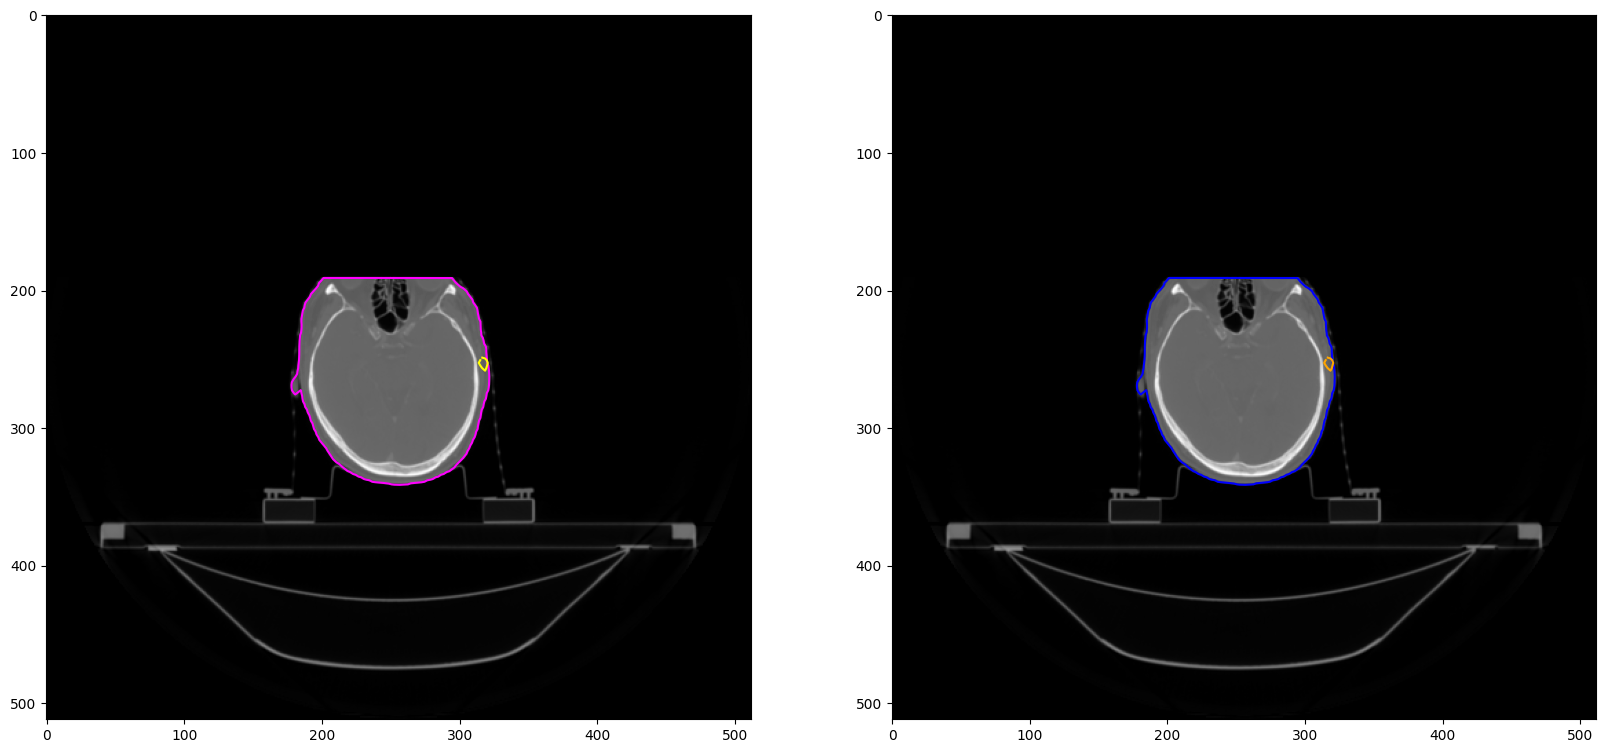

In [100]:

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1,2,1)
plt.imshow(image[slice_num],cmap='gray')

plt.plot(roi_x_old1,roi_y_old1,'-',color='magenta')
plt.plot(roi_x_old2,roi_y_old2,'-',color='yellow')

fig.add_subplot(1,2,2)
plt.imshow(image[slice_num],cmap='gray')
plt.plot(roi_x_new1,roi_y_new1,'-',color='blue')
plt.plot(roi_x_new2,roi_y_new2,'-',color='orange')

In [19]:
RS = RS_old
for i, seq in enumerate(RS.StructureSetROISequence):
    if seq.ROIName == 'BODY':
            index = i
            break


for i, ROI_contour_seq in enumerate(RS.ROIContourSequence[index].ContourSequence):
    z_ref = ROI_contour_seq.ContourData[2] 
   
    if z_ref == -545:
        print("******************************************")
        print("z-refs")
        print(ROI_contour_seq.ContourData)
        print(ROI_contour_seq)

******************************************
z-refs
[-16.58, -38.8, -545, -14.13, -38.66, -545, -11.67, -38.51, -545, -10.79, -38.15, -545, -9.21, -37.54, -545, -6.76, -37.15, -545, -4.3, -37.21, -545, -1.84, -37.07, -545, 0.61, -37.15, -545, 3.07, -37.13, -545, 5.22, -35.69, -545, 5.53, -35.46, -545, 7.99, -34.08, -545, 8.89, -33.24, -545, 10.44, -32.01, -545, 12.11, -30.78, -545, 12.9, -30.13, -545, 15.36, -28.83, -545, 15.93, -28.32, -545, 17.81, -26.75, -545, 18.88, -25.87, -545, 20.27, -24.64, -545, 21.58, -23.41, -545, 22.73, -22.26, -545, 24.12, -20.95, -545, 25.18, -20.01, -545, 26.8, -18.5, -545, 27.64, -17.7, -545, 29.66, -16.04, -545, 30.1, -15.65, -545, 32.56, -14.74, -545, 34.3, -13.58, -545, 35.01, -13.08, -545, 37.47, -12.43, -545, 39.93, -11.34, -545, 40.14, -11.12, -545, 42, -8.67, -545, 42.38, -8.31, -545, 44.84, -6.86, -545, 45.76, -6.21, -545, 47.3, -5.19, -545, 48.91, -3.75, -545, 49.75, -2.91, -545, 51.37, -1.3, -545, 52.21, -0.5, -545, 53.87, 1.16, -545, 54.67, 2.1

In [12]:
RS = RS_new
for i, seq in enumerate(RS.StructureSetROISequence):
    if seq.ROIName == 'BODY':
            index = i
            break


for i, ROI_contour_seq in enumerate(RS.ROIContourSequence[index].ContourSequence):
    z_ref = ROI_contour_seq.ContourData[2] 
   
    if z_ref == -545:
        print("******************************************")
        print("z-refs")
        print(ROI_contour_seq.ContourData)
        print(ROI_contour_seq)

******************************************
z-refs
[-16.58, -38.8, -545, -14.13, -38.66, -545, -11.67, -38.51, -545, -10.79, -38.15, -545, -9.21, -37.54, -545, -6.76, -37.15, -545, -4.3, -37.21, -545, -1.84, -37.07, -545, 0.61, -37.15, -545, 3.07, -37.13, -545, 5.22, -35.69, -545, 5.53, -35.46, -545, 7.99, -34.08, -545, 8.89, -33.24, -545, 10.44, -32.01, -545, 12.11, -30.78, -545, 12.9, -30.13, -545, 15.36, -28.83, -545, 15.93, -28.32, -545, 17.81, -26.75, -545, 18.88, -25.87, -545, 20.27, -24.64, -545, 21.58, -23.41, -545, 22.73, -22.26, -545, 24.12, -20.95, -545, 25.18, -20.01, -545, 26.8, -18.5, -545, 27.64, -17.7, -545, 29.66, -16.04, -545, 30.1, -15.65, -545, 32.56, -14.74, -545, 34.3, -13.58, -545, 35.01, -13.08, -545, 37.47, -12.43, -545, 39.93, -11.34, -545, 40.14, -11.12, -545, 42, -8.67, -545, 42.38, -8.31, -545, 44.84, -6.86, -545, 45.76, -6.21, -545, 47.3, -5.19, -545, 48.91, -3.75, -545, 49.75, -2.91, -545, 51.37, -1.3, -545, 52.21, -0.5, -545, 53.87, 1.16, -545, 54.67, 2.1

In [27]:
def triangulate_structure(full_stack, keys):
    pts, indices = render_body(full_stack,keys)
    triangles = [indices[i:i+3] for i in range(0, len(indices), 3)]
    
    return pts, triangles
    

In [28]:
def generate_mesh_from_RS(RS, structure, z_min=None, z_max=None):#z_cutoff=None):
    dict_contours, z_lists = get_all_ROI_contours([structure], RS)
    full_stack, keys = get_contour_stack(structure, dict_contours)
    
#     if z_cutoff is not None:
#         for key in keys.copy():
#             print(key)
#             if key < z_cutoff:
# #                 print(key)
#                 full_stack.pop(key)
#                 keys.remove(key)
        
    if z_min is not None or z_max is not None:
        if z_min is None:
            z_min = min(keys)
        if z_max is None:
            z_max = max(keys)
            
        for key in keys.copy():

            if key < z_min or key > z_max:
#                 print(key)
                if key in full_stack:
                    full_stack.pop(key)
                if key in keys:
                    keys.remove(key)

    
    
    return triangulate_structure(full_stack, keys)

In [29]:
def generate_mesh_from_array(slice_stack, z_cutoff=None):
    full_stack_int = {}
    keys = []


    for slice in slice_stack:
        xi, yi, zi = slice[::3], slice[1::3], slice[2::3]
        if z_cutoff is not None and zi[0] < z_cutoff:
            continue

        keys.append(zi[0])
        # Fit spline with s=0 (passing through all points)
        tck, u = interpolate.splprep([xi, yi], s=0, per=True)

        # Evaluate spline for 1000 evenly spaced points
        xj, yj = interpolate.splev(np.linspace(0, 1, 1000), tck)
        zj = [zi[0]]*1000
        full_stack_int[zi[0]] = []
        
        for i in range(len(zj)):
            full_stack_int[zi[0]].append(xj[i]) 
            full_stack_int[zi[0]].append(yj[i])
            
    
    
    
    return triangulate_structure(full_stack_int, keys)

In [30]:

# from three import BufferGeometry, Vector3, Mesh, MeshPhongMaterial, Float32BufferAttribute, Uint8Array

def distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def closest_index(x, y, array):
    dist = distance(x, y, array[0], array[1])
    index = 0
    for j in range(2, len(array), 2):
        newdist = distance(x, y, array[j], array[j+1])
        if newdist < dist:
            dist = newdist
            index = j
    return index

def render_body(slices, keys):
    pts = []  # The 3D points making up the entire body
    indices = []  # The indices of those points ordered in such a way that it forms a triangular mesh
    curr = 0  # The index of the current point (in the overall pts array, not of the current slice)
    colours = []  # The array of colours assigned to each point

    # Sort slice height (z) to be floats and in order
    keys.sort()

    # Loop through each slice to form triangle faces between current and subsequent slice
    for i in range(len(keys)):
        z = float(keys[i])  # the z value (height) of the slice
        slice = []  # stores the x and y values of each point in the slice (they all have the same z value)
        slice2 = []

        # Parse the slice data
        slice = slices[keys[i]]


        # Do not do for last slice since it will have already been connected to the previous slice

        if i < len(keys) - 1:
            slice2 = slices[keys[i+1]]

            

        # Loop through the points in the current slice
        index = 0
        for j in range(0, len(slice), 2):
            pts.extend([slice[j], slice[j+1], z])

            # If first iteration, find starting point on second slice (this ensure both slices align)
            if j == 0 and i != len(keys)-1:
                index = closest_index(slice[j], slice[j+1], slice2)

#             # Check if point is inside one of the beams (stored in meshes array) and sets colour accordingly
#             point = Vector3(slice[j], slice[j+1], z)
#             is_inside = False

#             for mesh in meshes:
#                 if ConvexHull(mesh).containsPoint(point):
#                     is_inside = True
#                     break
#             if is_inside:
#                 colours.extend([153, 153, 255])  # blue
#             else:
#                 colours.extend([127, 127, 127])  # grey

            # Algorithm to create two triangular faces (between points [c,a,d] and [a,b,d] per point
            if j != len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr - j//2 + len(slice)//2 + ((index//2)+j//2) % (len(slice2)//2)
                c = curr + 1
                d = curr - j//2 + len(slice)//2 + ((index//2)+j//2 +1) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # For the final point in the slice, algorithm is such that it links back to first points of each slice
            if j == len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr + (((index//2) + len(slice2)//2) ) % (len(slice2)//2)
                if index == 0:
                    b += len(slice2)//2
                c = curr - j//2
                d = curr + 1 + ((index//2)) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # Algorithm to cap top and bottom slices (creates triangles across the slice instead of to next slice)
            if (i == len(keys)-1 or i == 0) and j == 0:
                for k in range(1, len(slice)//4):
                    a = curr + k - 1
                    b = curr + (len(slice)//2 - k)
                    c = curr + k
                    d = curr + (len(slice)//2 - k - 1)

                    indices.extend([c, a, d])
                    indices.extend([a, b, d])

            curr += 1
    return pts, indices

    # Create buffer geometry from points and set index and position attributes
#     geo = BufferGeometry()
#     geo.set_index(indices)
#     geo.set_attribute('position', Float32BufferAttribute(pts, 3))

#     geo.compute_bounding_sphere()
#     geo.compute_vertex_normals()

#     # Set colour attribute
#     colours = Uint8Array(colours)
#     geo.set_attribute('color', BufferAttribute(colours, 3, True))
#     geo.attributes.color.normalized = True

#     # Create final mesh
#     mesh = Mesh(geo, MeshPhongMaterial(vertex_colors=VertexColors, side=DoubleSide, shininess=0))
#     group.add(mesh)

In [31]:
def get_contour_stack(contour_name, dict_contours,cutoff=-1000):
    XN = []
    YN = []
    ZN = []
    fullN = []
    full_stack_N = []
    y_prev = 0
    x_prev = 0
    for c in dict_contours[contour_name]:
    
        test = c
    #     full = full + list(c)
        slice = []

        if c[2] < cutoff:
            continue

        for i in range(0,len(c),3):

            x = test[i]
            y = test[i+1]
            z = test[i+2]

            if not (y== y_prev and x==x_prev): # ensure interpolation functin oworks
                XN.append(x)
                YN.append(y)
                ZN.append(z)
                fullN.append([x,y,z])
                slice = slice + [x,y,z]
            y_prev = y
            x_prev = x

        full_stack_N.append(slice)
        
            # full_stack = full_stack_N
    
    full_stack_int = {}
    keys = []


    for slice in full_stack_N:
        

    #     break
        xi, yi, zi = slice[::3], slice[1::3], slice[2::3]
#  
        # Append starting coordinates to make it closed
    #     xi = np.r_[xi, xi]
    #     yi = np.r_[yi, yi]

        keys.append(zi[0])
        # Fit spline with s=0 (passing through all points)
        tck, u = interpolate.splprep([xi, yi], s=0, per=True)

        # Evaluate spline for 1000 evenly spaced points
        xj, yj = interpolate.splev(np.linspace(0, 1, 1000), tck)
        zj = [zi[0]]*1000
        full_stack_int[zi[0]] = []
        print
        for i in range(len(zj)):
            full_stack_int[zi[0]].append(xj[i]) 
            full_stack_int[zi[0]].append(yj[i])

    return full_stack_int, keys



    

<Figure size 2000x2000 with 0 Axes>

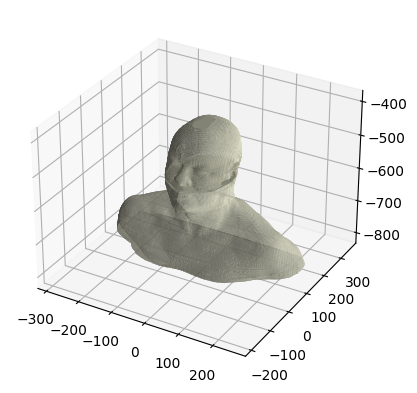

In [34]:

fig = plt.figure(figsize=(20, 20))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ptsL, trianglesL = generate_mesh_from_RS(RS,'BODY',z_max=7)
ax.plot_trisurf(ptsL[::3], ptsL[1::3], ptsL[2::3], triangles=trianglesL, alpha=1, shade=True,color='beige')  
ax.set_aspect('equal', adjustable='box')
plt.show()

In [3]:
path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/755/20170217_CT_16_JAN_2017/RS.1.2.246.352.221.51863009997549195494542629652303061399.dcm'

In [5]:
r = dcm.read_file(path
                 )

In [5]:
# r

In [15]:
for i,x in enumerate(RS_old.StructureSetROISequence):
    print(i,x.ROIName)

0 BODY
1 SHOULDERS
2 POST AVOID
3 MIDDLE AVOID
4 RING 70
5 RING 60
6 RING 56
7 AVOID 60
8 AVOID 56
9 ORAL CAVITY_NOS
10 LARYNX_NOS
11 PTV_ALL
12 PTV60+PTV70
13 PATOTID_L_NOS
14 PAROTID_R_NOS
15 Lung_L
16 Lung_R
17 ESOPHAGUS_2CM
18 Carina
19 Larynx
20 Parotid_R
21 Lens_R
22 PharCon_Mid
23 TemporalLobe_L
24 OpticNerve_L
25 SubmndSalv_R
26 Brainstem_PRV5
27 SpinalCord
28 PharCon_Sup
29 Esophagus_Upper
30 Lens_L
31 Brainstem
32 Cochlea_L
33 Parotid_L
34 BrachialPlexus_R
35 Cochlea_R
36 BrachialPlexus_L
37 Mandible
38 Chiasm
39 Level_Retropha_R
40 Level_Retropha_L
41 Eye_L
42 SubmndSalv_L
43 Eye_R
44 Puititary
45 Brain
46 BoneRadCalc
47 OpticNerve_R
48 Lips
49 TemporalLobe_R
50 SpinalCord_PRV5
51 PharCon_Inf
52 OralCavity
53 Thyroid
54 GTVp
55 GTVn
56 GTV
57 CTV70
58 CTV60
59 CTV56
60 PTV70
61 PTV60
62 PTV56
63 POST AVOID2
64 GTV SUGGSTION FC
65 INCLUDE ON CTV?


In [16]:
 # for i, ROI_contour_seq in enumerate(RS.ROIContourSequence[index].ContourSequence):

In [6]:
# print( RS_old.ROIContourSequence[43].ContourSequence)

In [7]:
# print(RS_old.StructureSetROISequence)

In [35]:
from anonymization import * 

In [46]:
patient_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/1551/'
CT_name = '20170119_CT_11_JAN_2017'
save_path = '/mnt/iDriveShare/Kayla/'
patient='1551'


In [37]:
patient_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/743/'
CT_name = '20200709_CT_30_JUN_2020'
save_path = '/mnt/iDriveShare/Kayla/'
patient='743'


20170119_CT_11_JAN_2017
Intersept: -1000
slope: 1
['Eye_L', 'Eye_R']
Centre ROI slice: 111
Keeping: ['PTV_ALL', 'PTV66_OPT', 'PTV66', 'PTV56', 'optic prv&PTV']
OG SIZE [ 97 210 142]
Slice resiszed 110
SPACING ct dose: ['1.20117188', '1.20117188', '3.0'] ['2.5', '2.5', 3.0]
*******
(142, 97, 210) ['1.20117188', '1.20117188', '3.0'] ['-307.5', '-226.5', '-780.0'] [-266.8505847, -29.74107029, -780]
(142, 202, 437)
*******


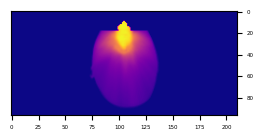

In [47]:
keywords_keep=['PTV']
if len(CT_name)==0:
    CT_file = get_first_CT(patient_path)
else:
    CT_file = CT_name
print(CT_file)
RS,RS_file = get_RS(patient_path, CT_file)

# print(RS.ROIContourSequence[0].ContourSequence)
#TODO: fixx dreadful return below to global var
slices,image,reverse_z, start_x, start_y, start_z, pixel_spacing, z_spacing, spacing,origin = init_data(patient_path, CT_file, RS)
# print(image[0])
origin = [start_x,start_y,start_z]
y_cutoff,z_lists,y_cutoff_roi,z_smg =  get_eye_contours(RS,start_x,start_y,start_z,z_spacing,pixel_spacing)
CT_spacing = [pixel_spacing[0],pixel_spacing[1],z_spacing]
CT_size = [len(image[0]),len(image[0][0]),len(image)] #to do double check x y are correct positon

img_slice = get_image_slice(start_z, np.mean(z_lists[0]), spacing)
if len(keywords_keep) == 0:
    dict_contours_keep = {}
else:
    list_names_keep = []
    for keyword in keywords_keep:
        list_names_keep = list_names_keep + find_ROI_names(RS,keyword=keyword)

    list_remove = []
    # note to make customized -- doesn't include structures starting with z and cases where it is OAR-PTV, which should refer to things outside the PTV
    for name in list_names_keep:
        if '-PTV' in name or 'nonptv' in name.lower() or name[0].lower()=='z':
            list_remove.append(name)

    # Note - separated as can't remove from list while looping through list
    for name in list_remove:
        list_names_keep.remove(name)
    print("Keeping:",list_names_keep)
    dict_contours_keep,_ = get_all_ROI_contours(list_names_keep,RS)

# print(find_ROI_names(RS)

anon, mask = generate_anon_image(image,z_lists,spacing,start_z,y_cutoff,reverse_z=reverse_z,contours_to_keep=dict_contours_keep,origin=origin)
# print("anon")
# print(anon[0])




new_dicom = anon_dicom(anon, slices)
all_contour_names = find_ROI_names(RS)
contour_names = [c for c in all_contour_names if c not in dict_contours_keep.keys()]
dict_contours_all,_ = get_all_ROI_contours(contour_names,RS)

dict_new_contours = {}


for contour_name in contour_names:
    full_stack_N = generate_anon_body(dict_contours_all,body_name = contour_name,z_lists=z_lists,y_cutoff=y_cutoff_roi,reverse_z=reverse_z,contours_to_keep=dict_contours_keep)
    # print(contour_name, full_stack_N)
    if full_stack_N != None:
        # print("to change",contour_name)
        dict_new_contours[contour_name] = full_stack_N

RS_new = save_RT_struct_all(RS, RS_file,dict_new_contours,save_path,patient,CT_file)




RD = find_dose_file(patient_path+'/'+CT_file)
anon_dose = generate_anon_dose(RD, mask,CT_spacing,origin,CT_size,np.mean(z_lists[0]))#img_slice)


In [48]:
dose_scaling = RD.DoseGridScaling
dose_gy = anon_dose  * dose_scaling

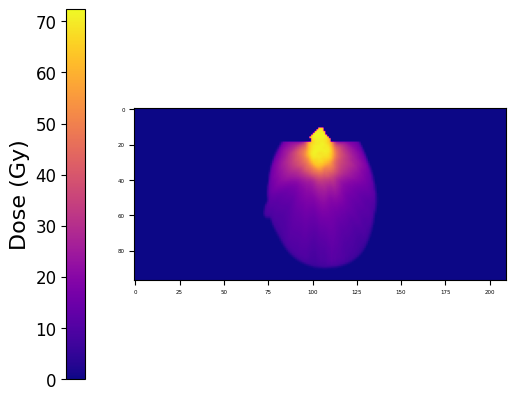

In [49]:
plt.rcParams.update({'font.size': 60})
plt.imshow(dose_gy[111],cmap=plt.cm.plasma)
cbar = plt.colorbar(label="Dose (Gy)",location='left')

# Manually set the font size for the colorbar label
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick font size
cbar.set_label("Dose (Gy)", fontsize=16)  # Set label font size

In [50]:

def plot_contours(RS,image,slice_num,origin,spacing,ignore_terms=[],legend=False):
    contours_not_on_slice = []
   
    all_ROIs = [r for r in find_ROI_names(RS)]
    for term in ignore_terms:
        all_ROIs = [r for r in all_ROIs if term.lower() not in r.lower()]
    
#     dict_contours, z_lists_b = get_all_ROI_contours(all_ROIs, RS)
    colours= get_ROI_colour_dict(RS)
    # print(colours)
    z_slice = image_to_xyz_coords_single(slice_num, spacing[2],origin[2])[0]
#     xyz_to_image_coords_single(X,spacing,origin):
    # print(z_slice)
    # 
    
    plt.imshow(image[slice_num],cmap='gray')
    for roi in all_ROIs:
        # print(roi)
        dict_contours, z_lists = get_all_ROI_contours([roi], RS)
        # print("X")
#         if len(dict_contours) >1:
        for i,r in enumerate(dict_contours):
            if r == roi:
                break
        try:       
            # print(z_slice, z_lists[i])
            roi_slice = get_ROI_slice(z_slice,z_lists[i])
            # print("ROI",len(roi_slice))
            
            c =colours[roi]
            for s in roi_slice:
                # print(s)
                # print("**")
                roi_x, roi_y = get_ROI_pixel_array(dict_contours[roi][s],origin[0],origin[1],spacing)
                plt.plot(roi_x,roi_y,'-',color=  (c[0]/255,c[1]/255,c[2]/255),label=roi)
        except Exception as e:
            contours_not_on_slice.append(roi)
            # print(roi,"not on slice.")
        
    if legend:
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))

        plt.legend(by_label.values(), by_label.keys(),prop={'size': 6},bbox_to_anchor = (1,0.5),loc='center left')
    # print("Other contours not on slice:",contours_not_on_slice)

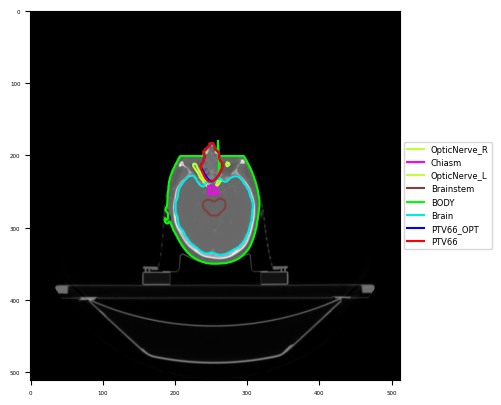

In [60]:
plot_all_contours(RS_new,anon,s-2,origin,spacing,ignore_terms = ['ctv','all','appar','bone','ring','dose','tissue','temp','prv'
                                                               ],legend=True)

In [64]:
anon.shape

(149, 512, 512)

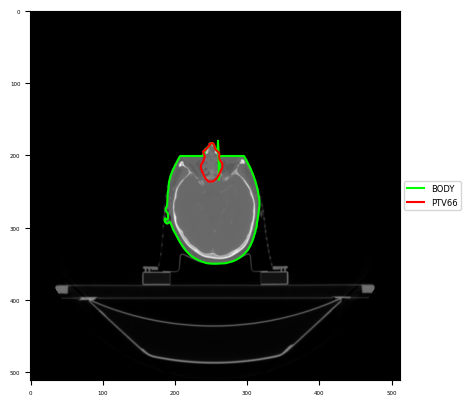

In [62]:
plot_all_contours(RS_new,anon,s-2,origin,spacing,ignore_terms = ['chiasm','brain','ctv','opt','all','appar','bone','ring','dose','tissue','temp','prv'
                                                               ],legend=True)

In [79]:
sa_path = '/mnt/iDriveShare/Kayla/Defacing/CTs_for_limbus/1511_A/A_20230911_CT_30_AUG_2023/'
s1_path = '/mnt/iDriveShare/Kayla/Defacing/CTs_for_limbus/1511/20230911_CT_30_AUG_2023/'
S1 = [dcm.read_file(s1_path+ s) for s in os.listdir(s1_path) if 'CT' in s]
# Order slices
S1.sort(key = lambda x: (x.InstanceNumber))
# image = get_pixels_hu(slices)
SA = [dcm.read_file(sa_path+ s) for s in os.listdir(sa_path) if 'CT' in s]
# Order slices
SA.sort(key = lambda x: (x.InstanceNumber))
# image = get_pixels_hu(slices)

In [80]:
np.max(SA[50].pixel_array)

2284

In [81]:
if np.all(SA[50].pixel_array == S1[50].pixel_array):
    print("YAAA")

YAAA


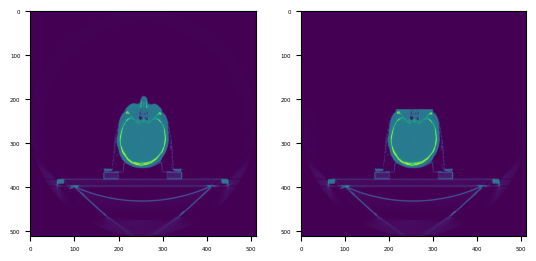

In [83]:
s = 100
plt.subplot(1,2,1)
plt.imshow(S1[s].pixel_array)
plt.subplot(1,2,2)
plt.imshow(SA[s].pixel_array)

In [ ]:
p